# Part 2: EDA

### 1. Cuisine Type/Category

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='white')
%matplotlib inline

In [3]:
df = pd.read_csv('scrubbed_data.csv')

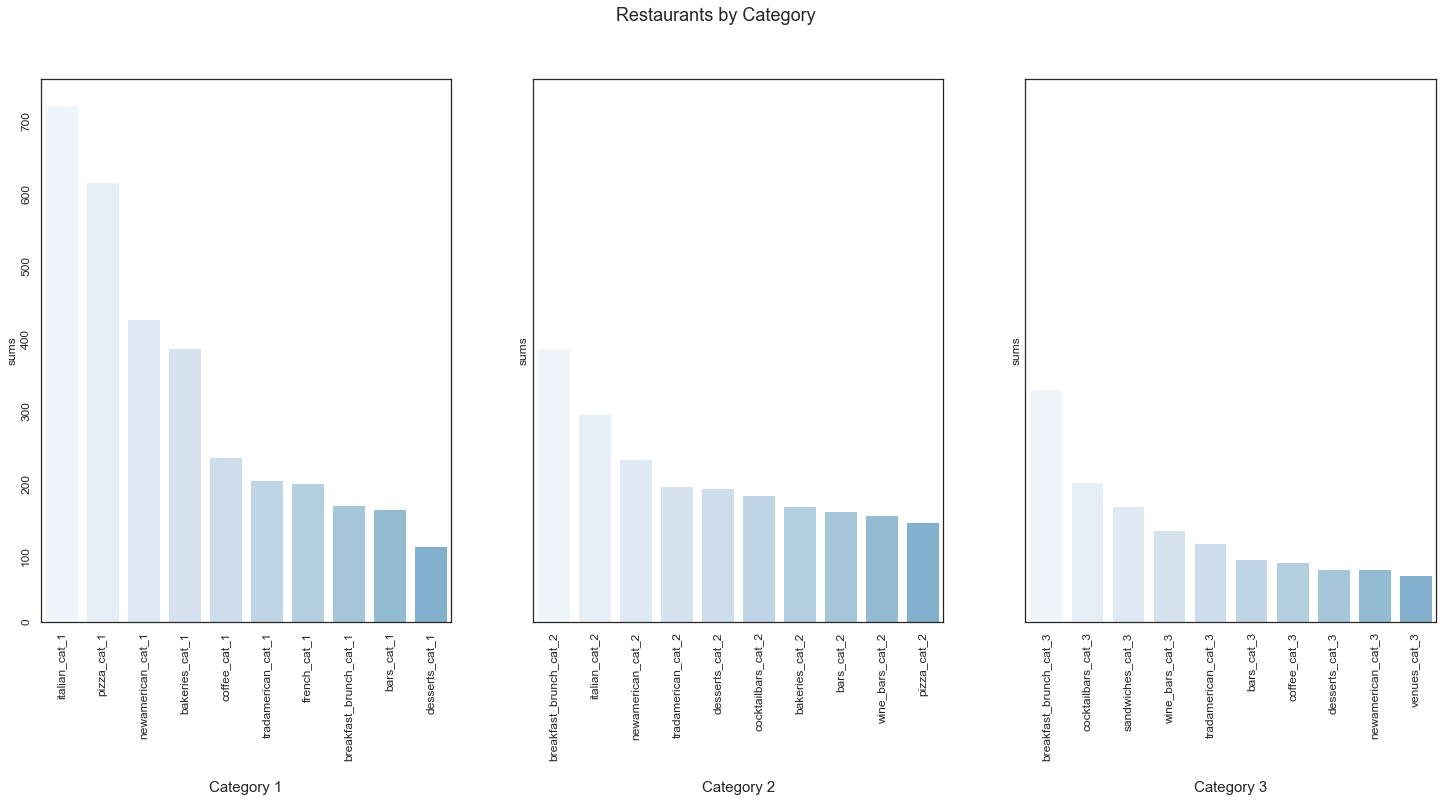

In [10]:
df.loc['sums'] = df.sum()
# first identify the cat cols
cat_cols1 = [col for col in df.columns if str(col).endswith('cat_1')]
cat_cols2 = [col for col in df.columns if str(col).endswith('cat_2')]
cat_cols3 = [col for col in df.columns if str(col).endswith('cat_3')]

cat_cols1_df = df[cat_cols1].loc['sums'].sort_values(ascending=False)
cat_cols1_df = pd.DataFrame(cat_cols1_df.reset_index())
cat_cols2_df = df[cat_cols2].loc['sums'].sort_values(ascending=False)
cat_cols2_df = pd.DataFrame(cat_cols2_df.reset_index())
cat_cols3_df = df[cat_cols3].loc['sums'].sort_values(ascending=False)
cat_cols3_df = pd.DataFrame(cat_cols3_df.reset_index())
# display(cat_cols1_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(25,10))
top_10_1 = cat_cols1_df[:10]
top_10_2 = cat_cols2_df[:10]
top_10_3 = cat_cols3_df[:10]

palette = sns.color_palette('Blues', 20, 1)
sns.barplot(data=top_10_1, x='index', y='sums', ax=ax1, palette=palette);
ax1.set_xlabel('\nCategory 1', fontsize=15);
ax1.tick_params(axis='both', which='major', labelsize=12, rotation=90);

sns.barplot(data=top_10_2, x='index', y='sums', ax=ax2, palette=palette);
ax2.set_xlabel('\nCategory 2', fontsize=15);
ax2.tick_params(axis='both', which='major', labelsize=12, rotation=90)

sns.barplot(data=top_10_3, x='index', y='sums', ax=ax3, palette=palette);
ax3.set_xlabel('\nCategory 3', fontsize=15);
ax3.tick_params(axis='both', which='major', labelsize=12, rotation=90)

fig.suptitle('Restaurants by Category', fontsize=18)


plt.show()

In [ ]:
These charts demonstrate the most frequent cuisine types by category. 

### 2. Price

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Text(0.5, 1.0, 'Frequency of Prices Among Above Average Restaurants')

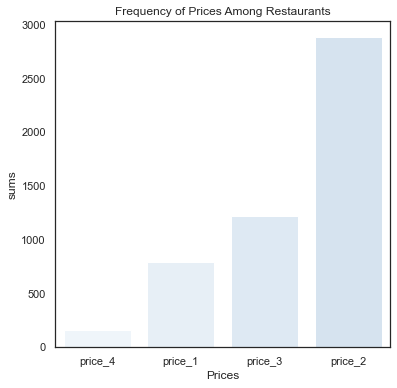

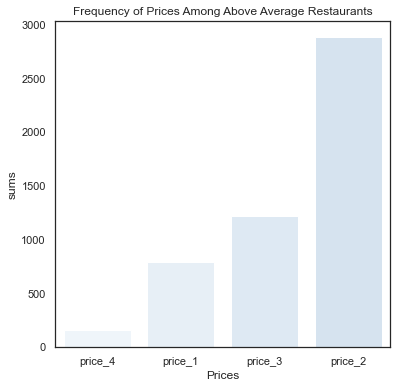

In [15]:
prices = ['price_1', 'price_2', 'price_3', 'price_4']
price_cols_df = df[prices].loc['sums'].sort_values()
price_cols_df = pd.DataFrame(price_cols_df.reset_index())

plt.figure(figsize=(6,6))
ax = sns.barplot(data=price_cols_df, x='index', y='sums', palette=palette);
ax.set_xlabel('Prices');
plt.title('Frequency of Prices Among Restaurants')

abv_avg = df[df.above_avg ==1]
abv_avg_prices_df = abv_avg[prices]
abv_avg_prices_df.loc['sums'] = df.sum()
price_cols_df2 = abv_avg_prices_df.loc['sums'].sort_values()
price_cols_df2 = pd.DataFrame(price_cols_df2.reset_index())

plt.figure(figsize=(6,6))
ax = sns.barplot(data=price_cols_df, x='index', y='sums', palette=palette);
ax.set_xlabel('Prices');
plt.title('Frequency of Prices Among Above Average Restaurants')

### 3. Neighborhood/NTA

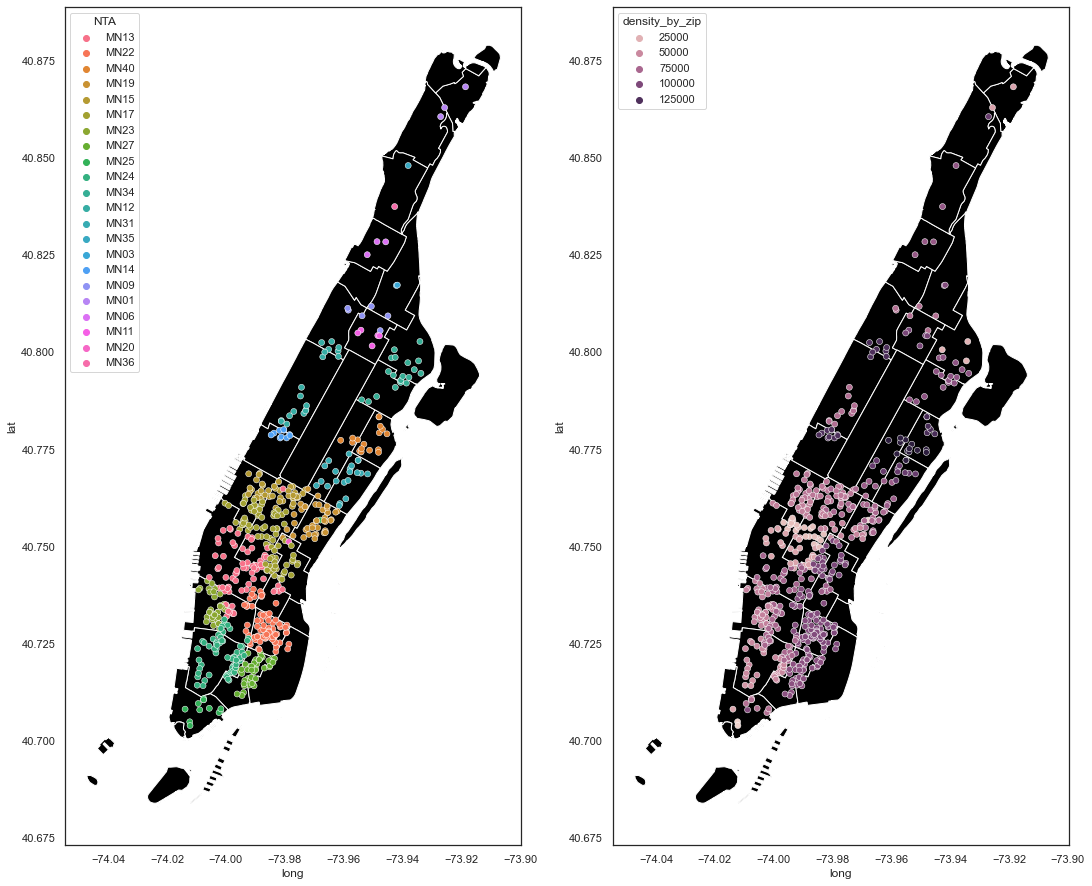

In [6]:
import geopandas as gpd

ny_geo = gpd.read_file('NTA map.geojson')
ny_geo = ny_geo[ny_geo.boroname == 'Manhattan']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,22))
ny_geo.plot(color='black', zorder=1, ax=ax1);
sns.scatterplot(data=df[df.above_avg == 1], x=df.long, y=df.lat, hue='NTA', 
               **{'edgecolor': 'white', 'facecolor': 'white', 'linewidth': .5, 'alpha': 1}, ax=ax1);

ny_geo.plot(color='black', zorder=1, ax=ax2);
sns.scatterplot(data=df[df.above_avg == 1], x=df.long, y=df.lat, hue='density_by_zip',
               **{'edgecolor': 'white', 'facecolor': 'white', 'linewidth': .5, 'alpha': 1}, ax=ax2);

### 4. Continuous Data

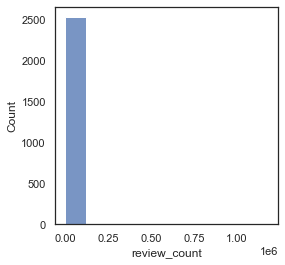

In [7]:
plt.figure(figsize=(4,4));
ax = sns.histplot(df.review_count, bins=10, palette=palette);

<Figure size 288x288 with 0 Axes>

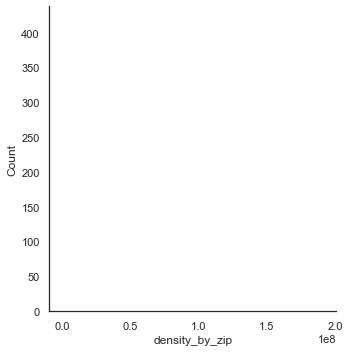

In [8]:
plt.figure(figsize=(4,4));
sns.displot(df.density_by_zip, palette=palette);

<Figure size 288x288 with 0 Axes>

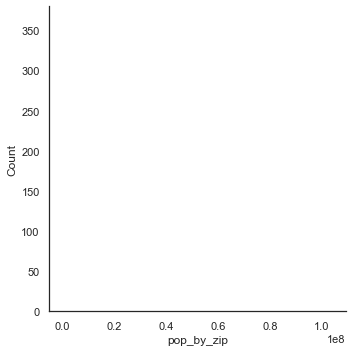

In [9]:
plt.figure(figsize=(4,4));
sns.displot(df.pop_by_zip, palette=palette);

### 5. Target: Above Average

In [ ]:
plt.figure(figsize=(4,4));
sns.countplot(data=df, x=df.above_avg, palette=palette)

In [ ]:
df.above_avg